In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Grouper
from pandas import DataFrame
from numpy import log
from numpy import sqrt

import warnings
warnings.filterwarnings("ignore")


In [2]:
ls

 Volume in drive C is OS
 Volume Serial Number is 7EFD-E000

 Directory of C:\Users\ChiranjeeviAR\Documents\excelr project\project 1\models

18-09-2022  21:02    <DIR>          .
18-09-2022  21:02    <DIR>          ..
18-09-2022  21:01    <DIR>          .ipynb_checkpoints
18-09-2022  21:01           236,250 ARIMA by murthy.ipynb
09-09-2022  14:08         2,834,820 arima.ipynb
18-09-2022  21:00         1,507,698 decision_tree.ipynb
17-09-2022  15:10         1,065,470 eda_updated (1).ipynb
25-08-2022  23:00            43,015 Gold_data.csv
26-08-2022  14:45            36,745 Gold_data.xlsx
18-09-2022  21:00         3,383,166 holt_winter.ipynb
18-09-2022  21:00         1,220,472 linear_regression.ipynb
09-09-2022  15:58         1,968,436 Project_Latest.ipynb
18-09-2022  21:00         1,571,788 random_forest.ipynb
09-09-2022  15:44           478,359 Screenshot (132).png
09-09-2022  14:06                72 Untitled.ipynb
18-09-2022  21:01           288,056 Updated Forecasting.ipynb
18-09-202

In [3]:
df = pd.read_csv("Gold_data.csv")
df

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [4]:
#df.set_index('date',inplace=True) ## making the month column as index

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2182 non-null   object 
 1   price   2182 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.2+ KB


In [6]:
df.dtypes

date      object
price    float64
dtype: object

In [7]:
df.describe()

,price
count,2182.000000
mean,3284.450046
std,719.564434
min,2252.600000
25%,2697.020000
50%,2879.800000
75%,4147.325000
max,4966.300000


In [8]:
df.isnull().sum()

date     0
price    0
dtype: int64

In [9]:
df[df.duplicated()].shape

(0, 2)

In [10]:
df[df.duplicated()]

,date,price


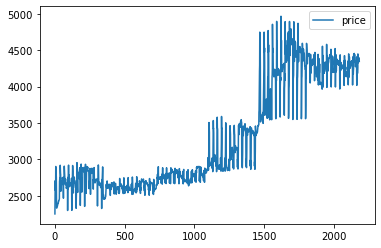

In [11]:
plt.rc('axes', labelsize=18)
df.plot()
plt.show()

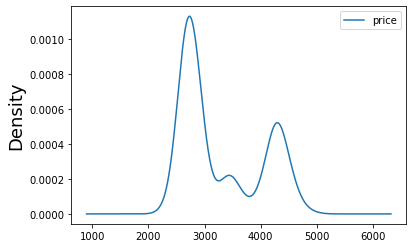

In [12]:
# create a density plot
df.plot(kind='kde')
plt.show()

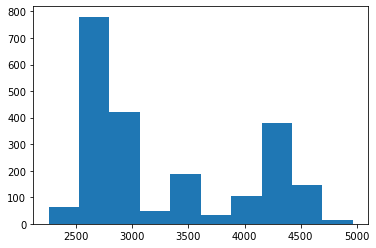

In [13]:
plt.hist(df["price"])
plt.show()

In [14]:
# newly added start:

In [15]:
df.dtypes

date      object
price    float64
dtype: object

In [16]:
# converting date from object to date
df["date"]=pd.to_datetime(df['date'])
df.dtypes

date     datetime64[ns]
price           float64
dtype: object

In [17]:
# fetching year wise data:
gold=df

In [18]:
gold.head()

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75


In [19]:
gold["year"]=df["date"].dt.year
gold.head(2)

,date,price,year
0,2016-01-01,2252.6,2016
1,2016-01-02,2454.5,2016


In [20]:
year_2016=gold[gold["year"]==2016]
year_2017=gold[gold["year"]==2017]
year_2018=gold[gold["year"]==2018]
year_2019=gold[gold["year"]==2019]
year_2020=gold[gold["year"]==2020]
year_2021=gold[gold["year"]==2021]

year_2016.head(5),year_2016.tail(5)

(        date    price  year
 0 2016-01-01  2252.60  2016
 1 2016-01-02  2454.50  2016
 2 2016-01-03  2708.10  2016
 3 2016-01-04  2577.80  2016
 4 2016-01-05  2597.75  2016,
           date        price  year
 361 2016-12-27  2469.300000  2016
 362 2016-12-28  2484.300000  2016
 363 2016-12-29  2498.100000  2016
 364 2016-12-30  2497.800000  2016
 365 2016-12-31  2534.033333  2016)

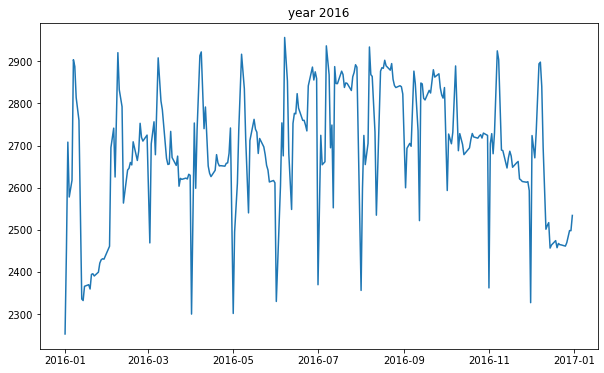

In [21]:
# plotting each year:
plt.figure(figsize=(10,6))
plt.plot(year_2016["date"],year_2016["price"])
plt.title("year 2016")
plt.show()


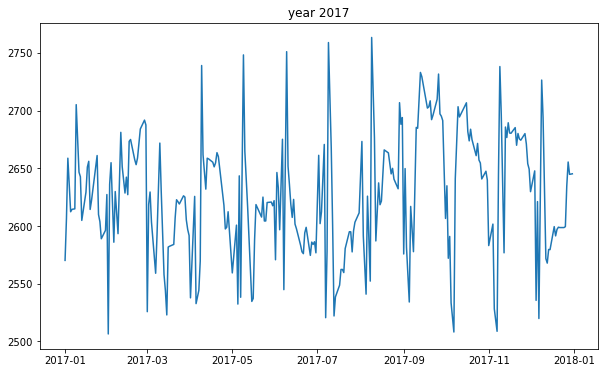

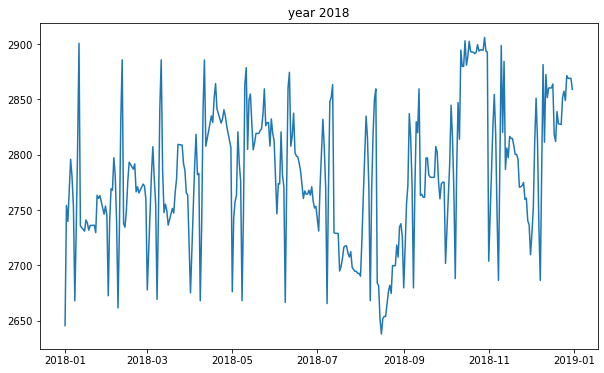

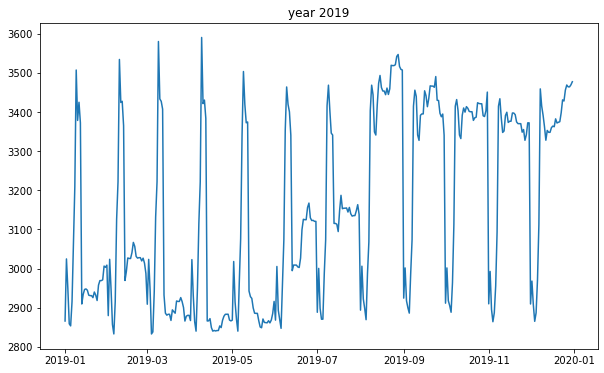

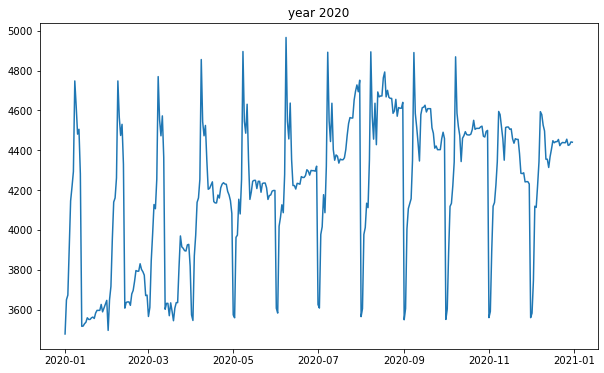

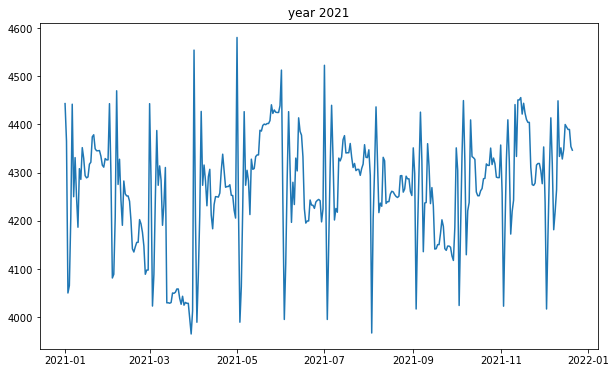

In [22]:
plt.figure(figsize=(10,6))
plt.plot(year_2017["date"],year_2017["price"])
plt.title("year 2017")
plt.show()

plt.figure(figsize=(10,6))
plt.plot(year_2018["date"],year_2018["price"])
plt.title("year 2018")
plt.show()

plt.figure(figsize=(10,6))
plt.plot(year_2019["date"],year_2019["price"])
plt.title("year 2019")
plt.show()

plt.figure(figsize=(10,6))
plt.plot(year_2020["date"],year_2020["price"])
plt.title("year 2020")
plt.show()

plt.figure(figsize=(10,6))
plt.plot(year_2021["date"],year_2021["price"])
plt.title("year 2021")
plt.show()

In [23]:
# fetching months:
gold["month"]=gold["date"].dt.month
gold.head(35)

,date,price,year,month
0,2016-01-01,2252.600000,2016,1
1,2016-01-02,2454.500000,2016,1
2,2016-01-03,2708.100000,2016,1
3,2016-01-04,2577.800000,2016,1
4,2016-01-05,2597.750000,2016,1
5,2016-01-06,2617.700000,2016,1
6,2016-01-07,2903.800000,2016,1
7,2016-01-08,2887.800000,2016,1
8,2016-01-09,2813.800000,2016,1
9,2016-01-10,2786.800000,2016,1


In [24]:
gold

,date,price,year,month
0,2016-01-01,2252.60,2016,1
1,2016-01-02,2454.50,2016,1
2,2016-01-03,2708.10,2016,1
3,2016-01-04,2577.80,2016,1
4,2016-01-05,2597.75,2016,1
...,...,...,...,...
2177,2021-12-17,4394.40,2021,12
2178,2021-12-18,4389.50,2021,12
2179,2021-12-19,4389.50,2021,12
2180,2021-12-20,4354.10,2021,12


In [25]:
year_2016=gold[gold["year"]==2016]
year_2017=gold[gold["year"]==2017]
year_2018=gold[gold["year"]==2018]
year_2019=gold[gold["year"]==2019]
year_2020=gold[gold["year"]==2020]
year_2021=gold[gold["year"]==2021]

year_2016.head(5),year_2016.tail(5)

(        date    price  year  month
 0 2016-01-01  2252.60  2016      1
 1 2016-01-02  2454.50  2016      1
 2 2016-01-03  2708.10  2016      1
 3 2016-01-04  2577.80  2016      1
 4 2016-01-05  2597.75  2016      1,
           date        price  year  month
 361 2016-12-27  2469.300000  2016     12
 362 2016-12-28  2484.300000  2016     12
 363 2016-12-29  2498.100000  2016     12
 364 2016-12-30  2497.800000  2016     12
 365 2016-12-31  2534.033333  2016     12)

In [26]:
year_2016

,date,price,year,month
0,2016-01-01,2252.600000,2016,1
1,2016-01-02,2454.500000,2016,1
2,2016-01-03,2708.100000,2016,1
3,2016-01-04,2577.800000,2016,1
4,2016-01-05,2597.750000,2016,1
...,...,...,...,...
361,2016-12-27,2469.300000,2016,12
362,2016-12-28,2484.300000,2016,12
363,2016-12-29,2498.100000,2016,12
364,2016-12-30,2497.800000,2016,12


In [27]:
# group by price based on month:
# 2016
y_2016=year_2016.groupby(["month"]).agg({"price":np.mean})
y_2016


,price
month,
1,2495.832258
2,2688.703448
3,2682.854839
4,2677.790000
5,2677.650000
6,2745.596667
7,2779.582258
8,2792.240323
9,2792.705000


In [28]:
y_2016.reset_index(inplace=True)

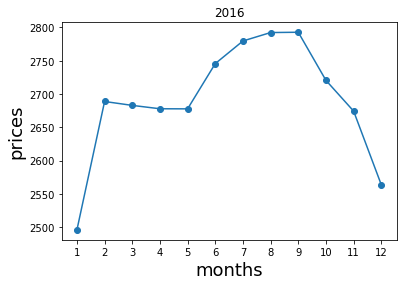

In [29]:
plt.scatter(y_2016["month"], y_2016["price"])
plt.plot(y_2016["month"], y_2016["price"])
plt.xlabel("months")
plt.ylabel("prices")
plt.title("2016")
plt.xticks(y_2016["month"])
plt.show()

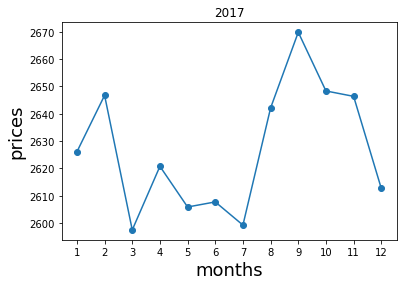

In [30]:
# 2017
y_2017=year_2017.groupby(["month"]).agg({"price":np.mean})
y_2017.reset_index(inplace=True)
plt.scatter(y_2017["month"], y_2017["price"])
plt.plot(y_2017["month"], y_2017["price"])
plt.xticks(y_2017["month"])
plt.xlabel("months")
plt.ylabel("prices")
plt.title("2017")
plt.show()

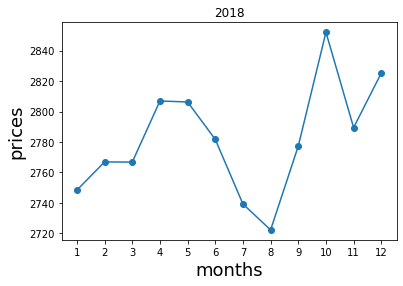

In [31]:
# 2018:
y_2018=year_2018.groupby(["month"]).agg({"price":np.mean})
y_2018.reset_index(inplace=True)
plt.scatter(y_2018["month"], y_2018["price"])
plt.plot(y_2018["month"], y_2018["price"])
plt.xticks(y_2018["month"])
plt.xlabel("months")
plt.ylabel("prices")
plt.title("2018")
plt.show()

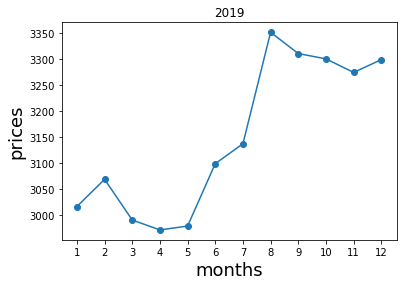

In [32]:
# 2019:
y_2019=year_2019.groupby(["month"]).agg({"price":np.mean})
y_2019.reset_index(inplace=True)
plt.scatter(y_2019["month"], y_2019["price"])
plt.plot(y_2019["month"], y_2019["price"])
plt.xticks(y_2019["month"])
plt.xlabel("months")
plt.ylabel("prices")
plt.title("2019")
plt.show()

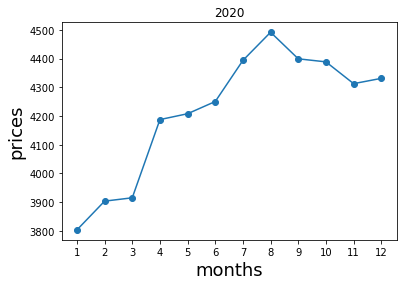

In [33]:
# 2020:
y_2020=year_2020.groupby(["month"]).agg({"price":np.mean})
y_2020.reset_index(inplace=True)
plt.scatter(y_2020["month"], y_2020["price"])
plt.plot(y_2020["month"], y_2020["price"])
plt.xticks(y_2020["month"])
plt.xlabel("months")
plt.ylabel("prices")
plt.title("2020")
plt.show()

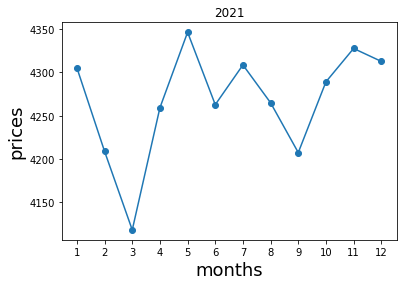

In [34]:
# 2021:y_2021.reset_index(inplace=True)
y_2021=year_2021.groupby(["month"]).agg({"price":np.mean})
y_2021.reset_index(inplace=True)
plt.scatter(y_2021["month"], y_2021["price"])
plt.plot(y_2021["month"], y_2021["price"])
plt.xticks(y_2021["month"])
plt.xlabel("months")
plt.ylabel("prices")
plt.title("2021")
plt.show()

In [35]:
# newly added end.

In [36]:
df['price_sqrt'] = (df['price'])**(1/2)
df['price_log'] = log(df['price'])

In [37]:
df

,date,price,year,month,price_sqrt,price_log
0,2016-01-01,2252.60,2016,1,47.461563,7.719840
1,2016-01-02,2454.50,2016,1,49.542911,7.805678
2,2016-01-03,2708.10,2016,1,52.039408,7.904003
3,2016-01-04,2577.80,2016,1,50.772040,7.854692
4,2016-01-05,2597.75,2016,1,50.968127,7.862401
...,...,...,...,...,...,...
2177,2021-12-17,4394.40,2021,12,66.290271,8.388086
2178,2021-12-18,4389.50,2021,12,66.253302,8.386971
2179,2021-12-19,4389.50,2021,12,66.253302,8.386971
2180,2021-12-20,4354.10,2021,12,65.985604,8.378873


<AxesSubplot:xlabel='date'>

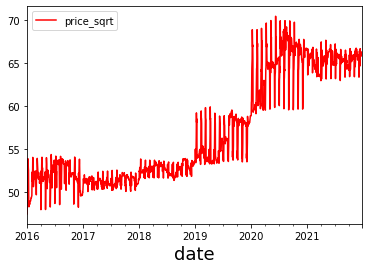

In [38]:
df.plot(x = 'date',y = 'price_sqrt',color = 'red')

<AxesSubplot:xlabel='date', ylabel='price_sqrt'>

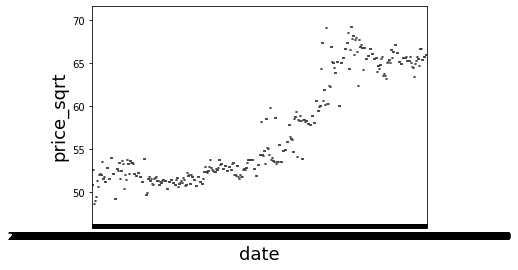

In [39]:
sns.boxplot(df.date,df.price_sqrt)

In [40]:
import numpy as np
DF=df.groupby(pd.DatetimeIndex(df["date"]).year).agg(np.mean)
DF

,price,year,month,price_sqrt,price_log
date,,,,,
2016,2690.614162,2016.0,6.513661,51.851549,7.896004
2017,2626.676484,2017.0,6.526027,51.248738,7.873289
2018,2781.938082,2018.0,6.526027,52.740980,7.930668
2019,3150.210685,2019.0,6.526027,56.087347,8.052419
2020,4216.378689,2020.0,6.513661,64.872209,8.342907
2021,4266.871549,2021.0,6.371831,65.315450,8.358277


In [41]:
DF.reset_index(inplace=True)

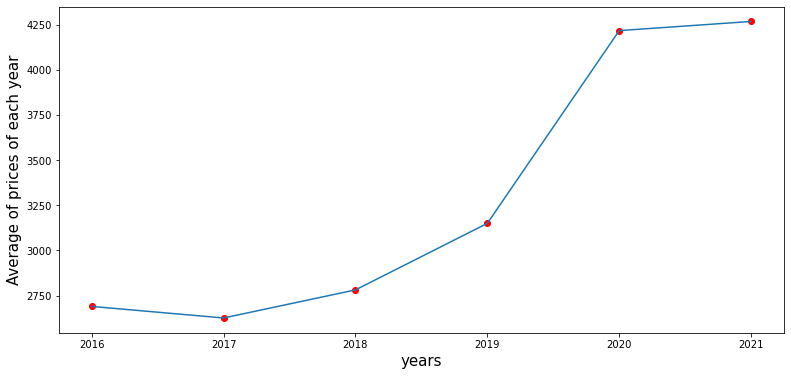

In [42]:
import matplotlib.pyplot as plt
plt.rc('axes', labelsize=15) 
plt.figure(figsize=(13,6))
plt.plot(DF.date,DF.price)
plt.xlabel("years")
plt.ylabel("Average of prices of each year")
plt.scatter(DF.date,DF.price,c='red')

In [43]:
import numpy as np
kf=df.groupby(pd.DatetimeIndex(df["date"]).month).agg(np.mean)
kf

,price,year,month,price_sqrt,price_log
date,,,,,
1,3165.796326,2018.500000,1.0,55.950626,8.038082
2,3214.831471,2018.494118,2.0,56.434510,8.057091
3,3178.425000,2018.500000,3.0,56.114496,8.045743
4,3253.865833,2018.500000,4.0,56.720211,8.065266
5,3270.410753,2018.500000,5.0,56.843587,8.068920
6,3291.177500,2018.500000,6.0,57.047911,8.076857
7,3326.265054,2018.500000,7.0,57.316817,8.085108
8,3377.567473,2018.500000,8.0,57.756848,8.100308
9,3359.573889,2018.500000,9.0,57.645105,8.097890


In [44]:
kf.reset_index(inplace=True)

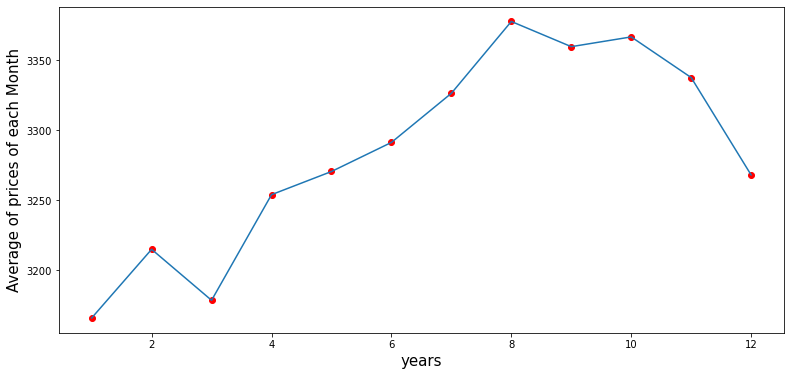

In [45]:
import matplotlib.pyplot as plt
plt.rc('axes', labelsize=15) 
plt.figure(figsize=(13,6))
plt.plot(kf.date,kf.price)
plt.xlabel("years")
plt.ylabel("Average of prices of each Month")
plt.scatter(kf.date,kf.price,c='red')

In [46]:
df["month"] = df.date.dt.strftime("%b") # month extraction
df["year"] = df.date.dt.strftime("%Y") # month extraction

In [47]:
df

,date,price,year,month,price_sqrt,price_log
0,2016-01-01,2252.60,2016,Jan,47.461563,7.719840
1,2016-01-02,2454.50,2016,Jan,49.542911,7.805678
2,2016-01-03,2708.10,2016,Jan,52.039408,7.904003
3,2016-01-04,2577.80,2016,Jan,50.772040,7.854692
4,2016-01-05,2597.75,2016,Jan,50.968127,7.862401
...,...,...,...,...,...,...
2177,2021-12-17,4394.40,2021,Dec,66.290271,8.388086
2178,2021-12-18,4389.50,2021,Dec,66.253302,8.386971
2179,2021-12-19,4389.50,2021,Dec,66.253302,8.386971
2180,2021-12-20,4354.10,2021,Dec,65.985604,8.378873


In [48]:
months = pd.get_dummies(df['month']) 
months

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0,0,1,0,0,0,0,0,0,0,0,0
2178,0,0,1,0,0,0,0,0,0,0,0,0
2179,0,0,1,0,0,0,0,0,0,0,0,0
2180,0,0,1,0,0,0,0,0,0,0,0,0


In [49]:
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

In [50]:
Data = pd.concat([df,months],axis=1) 

In [51]:
Data.head()

,date,price,year,month,price_sqrt,price_log,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2016-01-01,2252.60,2016,Jan,47.461563,7.719840,1,0,0,0,0,0,0,0,0,0,0,0
1,2016-01-02,2454.50,2016,Jan,49.542911,7.805678,1,0,0,0,0,0,0,0,0,0,0,0
2,2016-01-03,2708.10,2016,Jan,52.039408,7.904003,1,0,0,0,0,0,0,0,0,0,0,0
3,2016-01-04,2577.80,2016,Jan,50.772040,7.854692,1,0,0,0,0,0,0,0,0,0,0,0
4,2016-01-05,2597.75,2016,Jan,50.968127,7.862401,1,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='month', ylabel='year'>

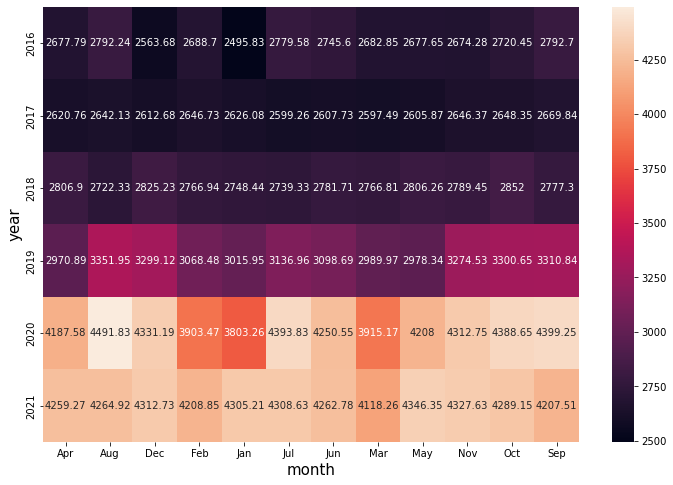

In [52]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=Data,values="price",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

<AxesSubplot:xlabel='year', ylabel='price'>

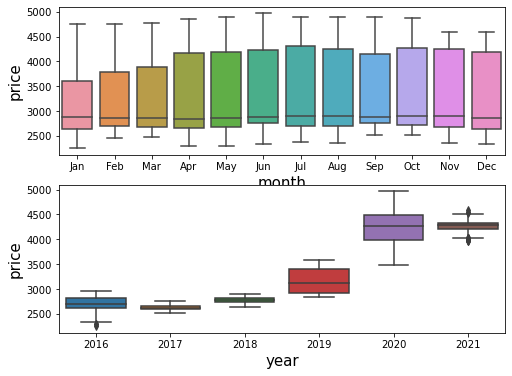

In [53]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="price",data= Data)
plt.subplot(212)
sns.boxplot(x="year",y="price",data=Data)

<AxesSubplot:xlabel='year', ylabel='price'>

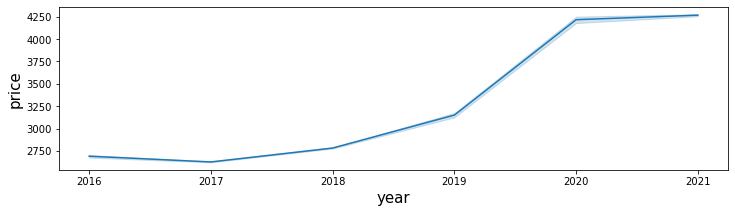

In [54]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="price",data=Data)

# model building:

## 1. Linear Regression:

In [55]:
Data.head(5)

,date,price,year,month,price_sqrt,price_log,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2016-01-01,2252.60,2016,Jan,47.461563,7.719840,1,0,0,0,0,0,0,0,0,0,0,0
1,2016-01-02,2454.50,2016,Jan,49.542911,7.805678,1,0,0,0,0,0,0,0,0,0,0,0
2,2016-01-03,2708.10,2016,Jan,52.039408,7.904003,1,0,0,0,0,0,0,0,0,0,0,0
3,2016-01-04,2577.80,2016,Jan,50.772040,7.854692,1,0,0,0,0,0,0,0,0,0,0,0
4,2016-01-05,2597.75,2016,Jan,50.968127,7.862401,1,0,0,0,0,0,0,0,0,0,0,0


In [56]:
data1=Data[["date","year","month","price","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]].copy()
data1.head(1)

,date,year,month,price,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2016-01-01,2016,Jan,2252.6,1,0,0,0,0,0,0,0,0,0,0,0


In [57]:
data1.dtypes

date     datetime64[ns]
year             object
month            object
price           float64
Jan               uint8
Feb               uint8
Mar               uint8
Apr               uint8
May               uint8
Jun               uint8
Jul               uint8
Aug               uint8
Sep               uint8
Oct               uint8
Nov               uint8
Dec               uint8
dtype: object

# splitting data:

In [58]:
train=data1.head(2000)
test=data1.tail(182)

In [59]:
train.shape,test.shape

((2000, 16), (182, 16))

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

In [73]:
reg_model=LinearRegression()

In [74]:
x_train=train.drop(["price","month"],axis=1)
x_train.head(1)

,date,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2016-01-01,2016,1,0,0,0,0,0,0,0,0,0,0,0


In [75]:
x_train.drop(["date"],axis=1,inplace=True)
x_train.head(1)

,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2016,1,0,0,0,0,0,0,0,0,0,0,0


In [76]:
#reg_model.fit(x_train,y_train)

# error:float() argument must be a string or a number, not 'Timestamp'
# we need to convert date into object:

In [77]:
x_train.dtypes

year    object
Jan      uint8
Feb      uint8
Mar      uint8
Apr      uint8
May      uint8
Jun      uint8
Jul      uint8
Aug      uint8
Sep      uint8
Oct      uint8
Nov      uint8
Dec      uint8
dtype: object

In [78]:
x_train["year"]=x_train["year"].astype(int)
x_train.dtypes

year    int32
Jan     uint8
Feb     uint8
Mar     uint8
Apr     uint8
May     uint8
Jun     uint8
Jul     uint8
Aug     uint8
Sep     uint8
Oct     uint8
Nov     uint8
Dec     uint8
dtype: object

In [79]:
y_train=train["price"]

In [80]:
reg_model.fit(x_train,y_train)

LinearRegression()

In [81]:
train_p=reg_model.predict(x_train)
train_p

array([2237.48043718, 2237.48043718, 2237.48043718, ..., 4218.95877917,
       4218.95877917, 4218.95877917])

In [82]:
train_rmse=sqrt(mse(y_train,train_p)).round(3)
train_rmse

347.554

In [83]:
# predicting:

In [84]:
test.head(5)

,date,year,month,price,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2000,2021-06-23,2021,Jun,4232.3,0,0,0,0,0,1,0,0,0,0,0,0
2001,2021-06-24,2021,Jun,4225.8,0,0,0,0,0,1,0,0,0,0,0,0
2002,2021-06-25,2021,Jun,4238.9,0,0,0,0,0,1,0,0,0,0,0,0
2003,2021-06-26,2021,Jun,4242.3,0,0,0,0,0,1,0,0,0,0,0,0
2004,2021-06-27,2021,Jun,4244.4,0,0,0,0,0,1,0,0,0,0,0,0


In [85]:
x_test=test.drop(["price","month"],axis=1)
x_test.head(5)

,date,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2000,2021-06-23,2021,0,0,0,0,0,1,0,0,0,0,0,0
2001,2021-06-24,2021,0,0,0,0,0,1,0,0,0,0,0,0
2002,2021-06-25,2021,0,0,0,0,0,1,0,0,0,0,0,0
2003,2021-06-26,2021,0,0,0,0,0,1,0,0,0,0,0,0
2004,2021-06-27,2021,0,0,0,0,0,1,0,0,0,0,0,0


In [86]:
x_test.drop(["date"],axis=1,inplace=True)

In [87]:
x_test.dtypes

year    object
Jan      uint8
Feb      uint8
Mar      uint8
Apr      uint8
May      uint8
Jun      uint8
Jul      uint8
Aug      uint8
Sep      uint8
Oct      uint8
Nov      uint8
Dec      uint8
dtype: object

In [88]:
x_test["year"]=x_test["year"].astype(int)
x_test.dtypes

year    int32
Jan     uint8
Feb     uint8
Mar     uint8
Apr     uint8
May     uint8
Jun     uint8
Jul     uint8
Aug     uint8
Sep     uint8
Oct     uint8
Nov     uint8
Dec     uint8
dtype: object

In [89]:
x_test.head(5)

,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2000,2021,0,0,0,0,0,1,0,0,0,0,0,0
2001,2021,0,0,0,0,0,1,0,0,0,0,0,0
2002,2021,0,0,0,0,0,1,0,0,0,0,0,0
2003,2021,0,0,0,0,0,1,0,0,0,0,0,0
2004,2021,0,0,0,0,0,1,0,0,0,0,0,0


In [90]:
# predicting:

In [132]:
predicted=reg_model.predict(x_test)
predicted=predicted.round(2)
predicted

array([4218.96, 4218.96, 4218.96, 4218.96, 4218.96, 4218.96, 4218.96,
       4218.96, 4243.77, 4243.77, 4243.77, 4243.77, 4243.77, 4243.77,
       4243.77, 4243.77, 4243.77, 4243.77, 4243.77, 4243.77, 4243.77,
       4243.77, 4243.77, 4243.77, 4243.77, 4243.77, 4243.77, 4243.77,
       4243.77, 4243.77, 4243.77, 4243.77, 4243.77, 4243.77, 4243.77,
       4243.77, 4243.77, 4243.77, 4243.77, 4314.08, 4314.08, 4314.08,
       4314.08, 4314.08, 4314.08, 4314.08, 4314.08, 4314.08, 4314.08,
       4314.08, 4314.08, 4314.08, 4314.08, 4314.08, 4314.08, 4314.08,
       4314.08, 4314.08, 4314.08, 4314.08, 4314.08, 4314.08, 4314.08,
       4314.08, 4314.08, 4314.08, 4314.08, 4314.08, 4314.08, 4314.08,
       4303.97, 4303.97, 4303.97, 4303.97, 4303.97, 4303.97, 4303.97,
       4303.97, 4303.97, 4303.97, 4303.97, 4303.97, 4303.97, 4303.97,
       4303.97, 4303.97, 4303.97, 4303.97, 4303.97, 4303.97, 4303.97,
       4303.97, 4303.97, 4303.97, 4303.97, 4303.97, 4303.97, 4303.97,
       4303.97, 4303

In [133]:
#reg_model.summary()

In [134]:
forecast=pd.DataFrame({"prediction":predicted})
forecast.head(5)

,prediction
0,4218.96
1,4218.96
2,4218.96
3,4218.96
4,4218.96


In [135]:
# set indexing starting from 2000
forecast = forecast.set_index(x_test.index)
forecast.head(5)

,prediction
2000,4218.96
2001,4218.96
2002,4218.96
2003,4218.96
2004,4218.96


In [136]:
y_test=test["price"]

In [137]:
y_test=pd.DataFrame({'actual price':y_test})

In [138]:
y_test.head(5)

,actual price
2000,4232.3
2001,4225.8
2002,4238.9
2003,4242.3
2004,4244.4


In [152]:
xx=pd.DataFrame({"actual price":test["price"],"predicted price":predicted})
print(xx.head(45))

      actual price  predicted price
2000        4232.3          4218.96
2001        4225.8          4218.96
2002        4238.9          4218.96
2003        4242.3          4218.96
2004        4244.4          4218.96
2005        4241.7          4218.96
2006        4197.8          4218.96
2007        4224.7          4218.96
2008        4522.6          4243.77
2009        4238.8          4243.77
2010        3995.4          4243.77
2011        4149.0          4243.77
2012        4310.8          4243.77
2013        4439.6          4243.77
2014        4330.3          4243.77
2015        4201.7          4243.77
2016        4225.6          4243.77
2017        4217.8          4243.77
2018        4330.1          4243.77
2019        4324.3          4243.77
2020        4332.6          4243.77
2021        4368.3          4243.77
2022        4376.7          4243.77
2023        4340.7          4243.77
2024        4341.2          4243.77
2025        4341.2          4243.77
2026        4360.4          

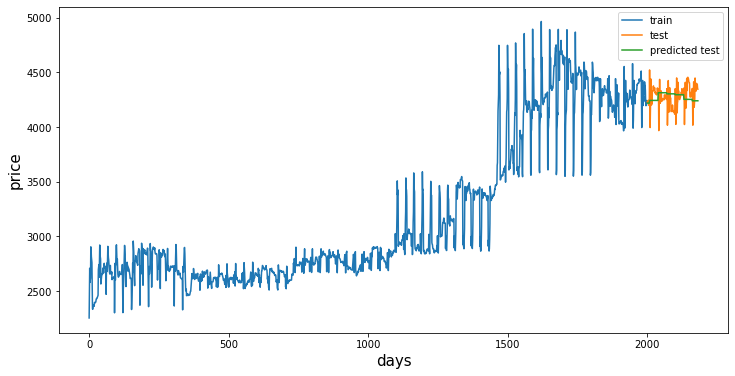

In [153]:
train["price"].plot(legend=True, label="train",figsize=(12,6))
test["price"].plot(legend=True, label="test")
forecast["prediction"].plot(legend=True,label="predicted test")
plt.xlabel("days")
plt.ylabel("price")
plt.show()

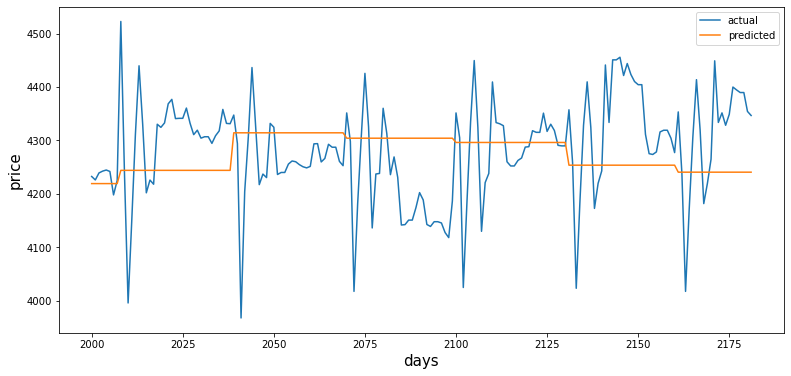

In [154]:
plt.figure(figsize=(13,6))
plt.plot( y_test['actual price'])
plt.plot(forecast["prediction"])
plt.xlabel("days")
plt.ylabel("price")
plt.legend(["actual","predicted"])

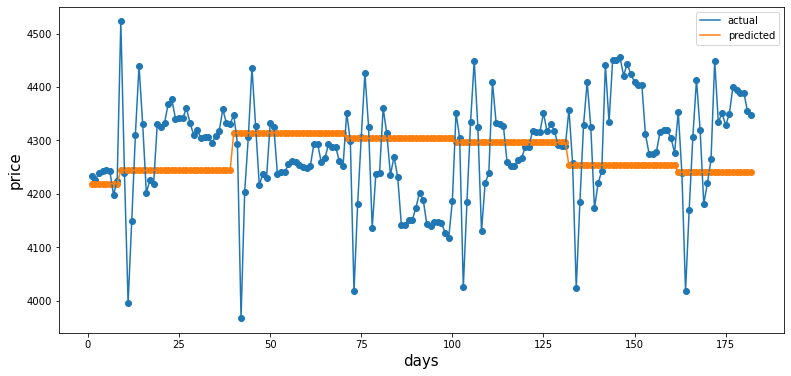

In [170]:
plt.figure(figsize=(13,6))
plt.scatter(np.arange(1,len(y_test)+1),y_test)
plt.plot(np.arange(1,len(x_test)+1), y_test)

plt.scatter(np.arange(1,len(y_test)+1),forecast)
plt.plot(np.arange(1,len(y_test)+1),forecast)
plt.xlabel("days")
plt.ylabel("price")
plt.legend(["actual","predicted"])


In [101]:
# model validation:
from sklearn.metrics import mean_squared_error as mse

In [102]:
mse(y_test,forecast)

11353.31108644925

In [103]:
# rmse:
z=sqrt(mse(y_test,forecast))
z

106.55191732882732

In [168]:
#Evaluation Metric MAPE
def MAPE(org,pred):
    temp = np.abs((org-pred)/org)*100
    return np.mean(temp)

In [169]:
MAPE(test["price"],predicted.round(2))

1.9685067142229968

In [166]:
#Mean Absolute PercentageERROR
MAPE 

1.968

In [106]:
a=pd.DataFrame({'linear_regression':["train","test"],'rmse':[train_rmse,z]})
a.round(3)

,linear_regression,rmse
0,train,347.554
1,test,106.552


In [107]:
#underfitted

## Final model

In [173]:
data1.head(5)

,date,year,month,price,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2016-01-01,2016,Jan,2252.60,1,0,0,0,0,0,0,0,0,0,0,0
1,2016-01-02,2016,Jan,2454.50,1,0,0,0,0,0,0,0,0,0,0,0
2,2016-01-03,2016,Jan,2708.10,1,0,0,0,0,0,0,0,0,0,0,0
3,2016-01-04,2016,Jan,2577.80,1,0,0,0,0,0,0,0,0,0,0,0
4,2016-01-05,2016,Jan,2597.75,1,0,0,0,0,0,0,0,0,0,0,0


In [174]:
df11=data1.drop(["date","month"],axis=1)

In [175]:
df11.head(5)

,year,price,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2016,2252.60,1,0,0,0,0,0,0,0,0,0,0,0
1,2016,2454.50,1,0,0,0,0,0,0,0,0,0,0,0
2,2016,2708.10,1,0,0,0,0,0,0,0,0,0,0,0
3,2016,2577.80,1,0,0,0,0,0,0,0,0,0,0,0
4,2016,2597.75,1,0,0,0,0,0,0,0,0,0,0,0


In [176]:
df11.dtypes

year      object
price    float64
Jan        uint8
Feb        uint8
Mar        uint8
Apr        uint8
May        uint8
Jun        uint8
Jul        uint8
Aug        uint8
Sep        uint8
Oct        uint8
Nov        uint8
Dec        uint8
dtype: object

In [177]:
df11["year"]=df11["year"].astype(int)
x_train.dtypes

year    int32
Jan     uint8
Feb     uint8
Mar     uint8
Apr     uint8
May     uint8
Jun     uint8
Jul     uint8
Aug     uint8
Sep     uint8
Oct     uint8
Nov     uint8
Dec     uint8
dtype: object

In [178]:
x_train=df11.drop("price",axis=1)
x_train.head(5)

,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2016,1,0,0,0,0,0,0,0,0,0,0,0
1,2016,1,0,0,0,0,0,0,0,0,0,0,0
2,2016,1,0,0,0,0,0,0,0,0,0,0,0
3,2016,1,0,0,0,0,0,0,0,0,0,0,0
4,2016,1,0,0,0,0,0,0,0,0,0,0,0


In [179]:
y_train=df11["price"]
y_train

0       2252.60
1       2454.50
2       2708.10
3       2577.80
4       2597.75
         ...   
2177    4394.40
2178    4389.50
2179    4389.50
2180    4354.10
2181    4346.50
Name: price, Length: 2182, dtype: float64

In [180]:
model=LinearRegression()

In [181]:
model.fit(x_train,y_train)

LinearRegression()

In [182]:
df11.head(5)

,year,price,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2016,2252.60,1,0,0,0,0,0,0,0,0,0,0,0
1,2016,2454.50,1,0,0,0,0,0,0,0,0,0,0,0
2,2016,2708.10,1,0,0,0,0,0,0,0,0,0,0,0
3,2016,2577.80,1,0,0,0,0,0,0,0,0,0,0,0
4,2016,2597.75,1,0,0,0,0,0,0,0,0,0,0,0


In [183]:
df.tail(1)

,date,price,year,month,price_sqrt,price_log
2181,2021-12-21,4346.5,2021,Dec,65.927991,8.377126


In [184]:
year=[2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,
      2022,2022,2022,2022,2022,2022,2022,2022,2022,2022,
      2022,2022,2022,2022,2022,2022,2022,2022,2022,2022]

In [185]:
Jan=[0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

Feb=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

Mar=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

Apr=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

May=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

Jun=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

Jul=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

Aug=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

Sep=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

Oct=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

Nov=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

Dec=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

In [186]:
future=pd.DataFrame({"year":year,"Jan":Jan,"Feb":Feb,"Mar":Mar,"Apr":Apr,"May":May,"Jun":Jun,"Jul":Jul,"Aug":Aug,"Sep":Sep,
                     "Oct":Oct,"Nov":Nov,"Dec":Dec})

In [187]:
# forecasting:
forecast=model.predict(future)
forecast

array([4218.34914471, 4218.34914471, 4218.34914471, 4218.34914471,
       4218.34914471, 4218.34914471, 4218.34914471, 4218.34914471,
       4218.34914471, 4218.34914471, 4467.24738465, 4467.24738465,
       4467.24738465, 4467.24738465, 4467.24738465, 4467.24738465,
       4467.24738465, 4467.24738465, 4467.24738465, 4467.24738465,
       4467.24738465, 4467.24738465, 4467.24738465, 4467.24738465,
       4467.24738465, 4467.24738465, 4467.24738465, 4467.24738465,
       4467.24738465, 4467.24738465])

In [188]:
forecast=pd.DataFrame(forecast)
forecast.head(2)

,0
0,4218.349145
1,4218.349145


In [189]:
forecast.rename(columns={0:"price"},inplace=True)
forecast.head(1)

,price
0,4218.349145


In [190]:
# set indexing starting from 2182
index=list(range(2182,2212))
#index

In [191]:
forecast = forecast.set_index([index])
forecast.head(5)

,price
2182,4218.349145
2183,4218.349145
2184,4218.349145
2185,4218.349145
2186,4218.349145


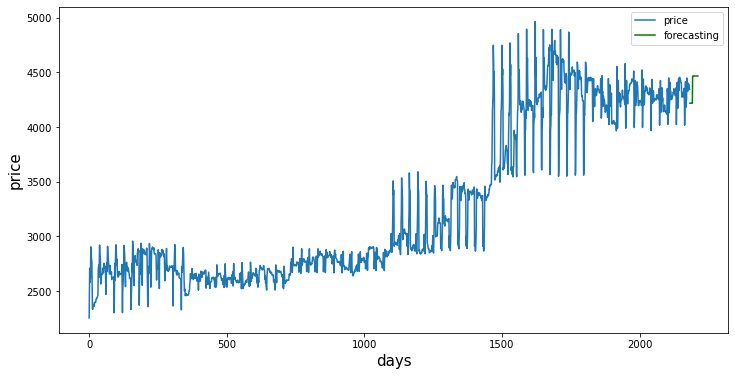

In [192]:
import matplotlib.pyplot as plt
df11["price"].plot(legend=True, label="price",figsize=(12,6))
forecast["price"].plot(legend=True, label="forecasting",c="g")
plt.xlabel("days")
plt.ylabel("price")
plt.show()

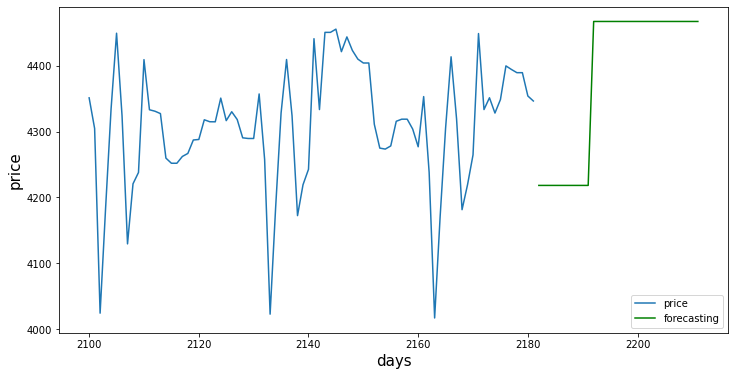

In [193]:
import matplotlib.pyplot as plt
df11["price"][2100:].plot(legend=True, label="price",figsize=(12,6))
forecast["price"].plot(legend=True, label="forecasting",c="g")
plt.xlabel("days")
plt.ylabel("price")
#plt.xticks(np.arange(2000,2187))
plt.show()